# Analyze A/B Test Results 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists.
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

<a id='probability'></a>
## Part I - Probability



In [1]:
#Import our libraries.
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same values.
random.seed(42)

### Section 1.1
Below is the description of the data, there are a total of 5 columns:

<center>
    
|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>


**a.** Reading the dataset from the `ab_data.csv` file:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
print('the number of rows in the dataset is {}.'.format(len(df)))

the number of rows in the dataset is 294478.


**c.** The number of unique users in the dataset.

In [4]:
print('The number of unique users in the dataset is {}.'.format(df['user_id'].nunique()))

The number of unique users in the dataset is 290584.


**d.** The proportion of users converted.

In [5]:
print('The proportion of users converted is {}.'.format(df['converted'].mean()))

The proportion of users converted is 0.11965919355605512.


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
treat_gr=df[df['group'] == 'treatment']
treat_Old = treat_gr.query('landing_page != "new_page"').user_id
print('The number of times when the "treatment" is control & landing page is old page is {}.'.format(len(treat_Old)))

The number of times when the "treatment" is control & landing page is old page is 1965.


**f.** Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**According to the below information and comparing it to the dataframe size thus the answer is NO**

### Section1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


In [8]:
#The number of times when the "group" is control but "landing_page" is not a old_page
control_gr=df[df['group'] == 'control']
control_New =control_gr[control_gr['landing_page']!= 'old_page'].user_id
print('The number of times when the "group" is control & landing page is new page is {}.'.format(len(control_New)))

The number of times when the "group" is control & landing page is new page is 1928.


In [9]:
treat_gr.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [10]:
control_gr.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [11]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 =df.drop(treat_Old.index)
df2 =df2.drop((control_New.index))
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


**Checking if there still any incorrect rows**

In [13]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### Section 1.3  

**a.** How many unique **user_id**s are in **df2**?

In [14]:
print('The number of unique user_ids are in df2 is {}.'.format(df2['user_id'].nunique()))

The number of unique user_ids are in df2 is 290584.


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2['user_id'].value_counts().head()

773192    2
630836    1
634271    1
753093    1
751044    1
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [16]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [17]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2.drop(df2[df2['user_id'].duplicated()].index)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'].duplicated()].shape[0]

0

In [18]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


### Section 1.4  
**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [19]:
prob_convert_pop = df2['converted'].mean()
print('The probability of an individual converting regardless of the page they receive is {}.'.format(prob_convert_pop))

The probability of an individual converting regardless of the page they receive is 0.11959708724499628.


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
prob_convert_control = df2[df2['group'] == 'control']['converted'].mean()
print('The probability of an individual convert knowing that they are in Control group {}.'.format(prob_convert_control))

The probability of an individual convert knowing that they are in Control group 0.1203863045004612.


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
prob_convert_treat = df2[df2['group'] == 'treatment']['converted'].mean()
print('The probability of an individual convert knowing that they are in Treatment group {}.'.format(prob_convert_treat))

The probability of an individual convert knowing that they are in Treatment group 0.11880806551510564.


In [22]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = prob_convert_treat - prob_convert_control
print('The actual difference between the conversion rates is {}.'.format(obs_diff))

The actual difference between the conversion rates is -0.0015782389853555567.


**d.** What is the probability that an individual received the new page?

In [23]:
prob_newpage = df2[df2['landing_page'] == 'new_page']
prob_newpage = len(prob_newpage['landing_page']) / len(df2['landing_page'])
print('The probability that an individual received the new page is {}.'.format(prob_newpage))

The probability that an individual received the new page is 0.5000619442226688.


**e.** According to the results from parts (a) through (d) above, we can explain whether the new `treatment` group users lead to more conversions.

>As we can see from the above observations we can see that **the probability of conversion of the control group is slightly higher than the probability of conversion of the treatment group** Thus we can see that we have a -ve observation difference, Yet we don't a sufficient evidence to say that the new page leads to more conversions.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, we could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### Section 2.1 
If we want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be the null and Alternative hypotheses (**$H_0$** and **$H_1$**)?  

We can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages Respectively.

***Let us assume the following:***
 
> `1.` **We can say that our null hypotheses is True Unless the alternative hypotheses proves to be definitely better at a Type I error rate of 5%.**

> `2.` **Our null hypotheses will in this case the old page is better & our alternative hypotheses will be that new page is better, this can Be translated to the following equation:**
<center>
$H_0$ : $p_{new}$ - $p_{old}$ <= 0  $H_1$ : $p_{new}$ - $p_{old}$ > 0
</center> 


### Section 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

The main objectives of this section will be: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [24]:
p_new = prob_convert_pop
print('The conversion rate for pnew is {}.'.format(p_new))

The conversion rate for pnew is 0.11959708724499628.


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [25]:
p_old =prob_convert_pop
print('The conversion rate is pold {}.'.format(p_old))

The conversion rate is pold 0.11959708724499628.


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [26]:
n_new = len(df2.query('landing_page == "new_page"'))
print('Thenumber of individuals in the treatment group is {}.'.format(n_new))

Thenumber of individuals in the treatment group is 145310.


**d.** What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = len(df2.query('landing_page == "old_page"'))
print('Thenumber of individuals in the Control group is {}.'.format(n_old))

Thenumber of individuals in the Control group is 145274.


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [28]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0 , 1] ,size=n_new, p= [1 -p_new,p_new])
new_page_converted.mean()

0.12116165439405409

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [29]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0 , 1] ,size=n_new, p= [1 -p_old,p_old])
old_page_converted.mean()

0.12033583373477393

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [30]:
diff =new_page_converted.mean() - old_page_converted.mean()
diff

0.0008258206592801631


**h. Sampling distribution** <br>

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [31]:
# Sampling distribution 
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.

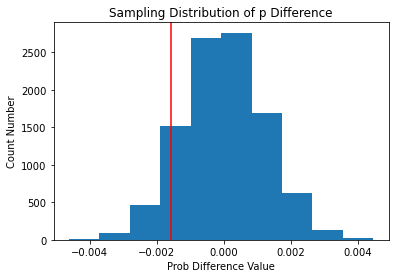

In [32]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.title('Sampling Distribution of p Difference')
plt.xlabel('Prob Difference Value')
plt.ylabel('Count Number')
plt.axvline(obs_diff,color = 'red')
plt.show()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [33]:
(p_diffs > obs_diff).mean()

0.9076

**k.** So the questions we need to answer after the previous insights are:
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages?

**The value that is computed in part j is called p value, it's used to give an evidince for us so that we can have an evidence that can support or reject our assumed null hypothesis, furthermore The p value should be below our Type 1 error rate of 0.05 which indicates our level of confidence in assuming that null hypothesis is True**

>In our case here we have a **p of 0.9** which indicates that we can reject our null hypothesis yet, we don't have a sufficient evidence that there is a difference between old & new pages.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.

We need to calculate the following:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [34]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2[(df2['converted'] == True) & (df2['landing_page'] == 'old_page')])

# number of conversions with the new_page
convert_new = len(df2[(df2['converted'] == True) & (df2['landing_page'] == 'new_page')])

# number of individuals who were shown the old_page
n_old = len(df2[df2['landing_page'] == 'old_page'])
# number of individuals who received new_page
n_new = len(df2[df2['landing_page'] == 'new_page'])

convert_old , convert_new , n_old , n_new

(17489, 17264, 145274, 145310)

**m.** Now we can use `sm.stats.proportions_ztest()` to compute the test statistic and p-value.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**notes to consider**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- [Page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [35]:
import statsmodels.api as sm
# Use sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


**n. Questions to ask** 

1. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  

2. Do they agree with the findings in parts **j.** and **k.**?
3. Can we reject/fail to reject the null hypothesis?

**We can clearly see that the our originally calculated p value is the same as the one currently calculated using Z-test function of a p = 0.9, Meanwhile the z-score value is a numerical measurement that describes a value's relationship to the mean of a group of values, & it's measured in terms of standard deviations.**

<a id='regression'></a>
### Part III - A regression approach

### Section 3.1 
In this final part, we will see that the results achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 


>From the 5 types of regression we can use `logistic regression` since our dependent variable have a discrete value.

In [36]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** The goal is to use **statsmodels** library to fit the regression model we specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, we first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [37]:
df2['intercept'] = 1
df2[['ab_page' , 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.drop('old_page' ,axis = 1, inplace = True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate the regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [38]:
model = sm.Logit(df2.converted ,df2[['intercept','ab_page']])
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of the model below

In [39]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Mar 2022   Pseudo R-squ.:               8.077e-06
Time:                        21:19:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [40]:
np.exp(res.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [41]:
1/np.exp(res.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


> `1` As we can see If an individual had visited the old page they are **1.015 times more likely to be converted than if they visited the new page**, holding all other variables constant.

> `2` Our p value corresponding to regression is 0.189 which is **not statistically significant** with being converted & it's still lower than 0.05 so we still can't reject null hypothesis.

> **The p value is different from part 2 because Logit Regression is based on a two-tailed test.**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**We can assume that the converting parameter is correlated with different values which we don't have in this datasets such as Age or gender & adding any additional terms might be useful to investegate the relationship between our dependent variable More.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


In [42]:
# Read the countries.csv
countries = pd.read_csv('countries.csv')

In [43]:
# Join with the df2 dataframe
df_merged = df2.set_index('user_id').join(countries.set_index('user_id'))
df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [44]:
# Create the necessary dummy variables
df_merged[['CA','UK', 'US']] = pd.get_dummies(df_merged['country'])
df_merged.drop('CA' ,axis =1 , inplace = True)
df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1


In [45]:
# Fit the model, and summarize the results
model_2 = sm.Logit(df_merged['converted'] , df_merged[['intercept','UK' , 'US']])
res_2 = model_2.fit()
res_2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 11 Mar 2022   Pseudo R-squ.:               1.521e-05
Time:                        21:19:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

>**As we can see from the results above, the p values for Uk & Us are still above 0.05, so we still cannot reject the null Hypothesis, hence countries are not statistically significant in the conversion rates.**

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


After that we can provide the summary results (statistical output), and the conclusions (written response) based on the results. 

In [46]:
#Create the necessary additional columns
df_merged['UK_ab_page'] = df_merged['UK'] * df_merged['ab_page']
df_merged['US_ab_page'] = df_merged['US'] * df_merged['ab_page']
df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0


In [47]:
# Fit your model, and summarize the results
model_3 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'UK', 'UK_ab_page', 'US_ab_page']])
res3 = model_3.fit()
res3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 11 Mar 2022   Pseudo R-squ.:               3.482e-05
Time:                        21:19:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

> As we can see from the results above, **p-values for all variables We can see that all are still higher than 0.05** hence we can say that interactions between page and country have no significant effects on convert rate.

<a id='conclusion'></a>
## Conclusion
### So our final conclusion after interpretation of the results above we can say that :

>`1.` That the country columns has any **no significant impact** on the conversion or not. 

>`2.` That **old page is slightly being more converted into**, after considering all the tests performed in the project. 

So in the end of this analysis & according to finding & results we can conclude that **we do not have sufficient evidence to suggest that the new Page will lead to more conversions rates than the old one.**